In [2]:
import pandas as pd
import numpy as np

We'll be looking at transfer data from the year 1992 to 2018.

In [3]:
years = [i for i in range(1992,2019)]

Let's create an empty Dataframe first.

In [4]:
df = pd.DataFrame(columns=['club_name', 'player_name', 'age', 'position', 'club_involved_name', 'fee', 'transfer_movement', 'fee_cleaned', 'league_name', 'year','season'])

In [5]:
for y in years:
    df = df.append(pd.read_csv('transfers/data/'+str(y)+'/english_premier_league.csv'), ignore_index=True)
    
df = df[df['transfer_movement']=='in']

In [6]:
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Arsenal FC,Martin Keown,26,Centre-Back,Everton,£2.70m,in,2.70,Premier League,1992,1992/1993
1,Arsenal FC,John Jensen,27,Central Midfield,Bröndby IF,£1.44m,in,1.44,Premier League,1992,1992/1993
2,Arsenal FC,Gavin McGowan,16,Defender,Arsenal U18,-,in,0.00,Premier League,1992,1992/1993
3,Arsenal FC,Alan Miller,22,Goalkeeper,Birmingham,NaN,in,NaN,Premier League,1992,1992/1993
4,Arsenal FC,Jim Will,20,Goalkeeper,Sheffield Utd.,NaN,in,NaN,Premier League,1992,1992/1993


We see that there are a lot of records for which fees are not available (NaNs). We have to get rid of these records.

In [7]:
df.dropna(inplace=True)

We also see a few records where the players came from the youth teams of that club. Also there are records with players who didn't belong to any club before being transfered. We won't consider them in our data.

In [8]:
df = df[(df['fee']!='-')]

Now we can have a look at how the total expenditure on transfers has varied over the years.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

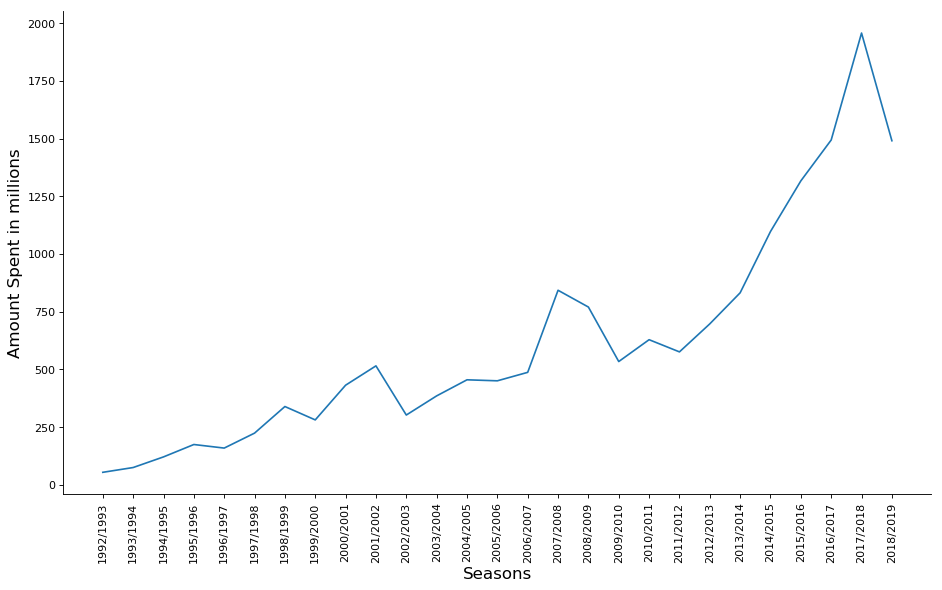

In [10]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Draw the plot
plt.plot(df[['season', 'fee_cleaned']].groupby(['season']).agg(['sum']))
plt.xlabel('Seasons', fontsize=15)
plt.ylabel('Amount Spent in millions', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Now that we know how the amount spent on transfers varied since 1992, let us have a look how the amount spent on transfers varied by position. Before that, let us see how many different types of positions do we have in our data.

In [11]:
df['position'].value_counts()

Centre-Forward        1795
Centre-Back           1398
Goalkeeper            1041
Central Midfield       923
Defensive Midfield     563
Left-Back              548
Right-Back             544
Right Winger           400
Attacking Midfield     388
Left Winger            346
Left Midfield          196
Right Midfield         172
Midfielder             145
Second Striker         117
Defender               107
Forward                101
Sweeper                  3
Name: position, dtype: int64

We see that we have over 15 types of positions present in our database. We dont need to find the transfer amount variance for each of these individual categories.

Instead, we can group these positions into four categories, namely:
* Forward
* Midfielder
* Defender
* Goalkeeper

We will write a function to create a new column in our dataframe with these categories.

In [12]:
def categorize_positions(val):
    if val in ['Forward','Second Striker','Centre-Forward']:
        return 'Forward'
    if val in ['Central Midfield','Defensive Midfield','Right Winger','Attacking Midfield','Left Winger','Left Midfield','Right Midfield','Midfielder']:
        return 'Midfielder'
    if val in ['Centre-Back','Left-Back','Right-Back','Defender','Sweeper']:
        return 'Defender'
    else:
        return val

Now we apply this function to the position column in our dataframe, and create a new column named position_category

In [13]:
df['position_category'] = df['position'].apply(lambda x: categorize_positions(x))

In [14]:
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season,position_category
0,Arsenal FC,Martin Keown,26,Centre-Back,Everton,£2.70m,in,2.700,Premier League,1992,1992/1993,Defender
1,Arsenal FC,John Jensen,27,Central Midfield,Bröndby IF,£1.44m,in,1.440,Premier League,1992,1992/1993,Midfielder
5,Arsenal FC,Steve Morrow,21,Right-Back,Barnet,"End of loanJun 30, 1992",in,0.000,Premier League,1992,1992/1993,Defender
9,Ipswich Town,Geraint Williams,30,Defensive Midfield,Derby,£675k,in,0.675,Premier League,1992,1992/1993,Midfielder
16,Ipswich Town,Glenn Pennyfather,30,Defender,Bristol City,"End of loanMar 1, 1993",in,0.000,Premier League,1992,1992/1993,Defender


Now, our aim is to obtain the fees per category per season. We thus use groupby on our dataframe.

In [15]:
df_grouped = df[['season','position_category','fee_cleaned']].groupby(['season','position_category']).agg('sum')

In [16]:
df_grouped.head()

fee_cleaned
season    position_category             
1992/1993 Defender                10.972
          Forward                 21.470
          Goalkeeper               1.809
          Midfielder              20.508
1993/1994 Defender                18.699

Before we go ahead and plot our graph using the df_grouped dataframe, we need to unstack the dataframe. If you wish to understand in depth what unstacking is, you can check this article: https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

In [17]:
df_grouped = df_grouped.unstack()

This is how our unstacked data looks like.

In [18]:
df_grouped.head()

fee_cleaned                              
position_category    Defender Forward Goalkeeper Midfielder
season                                                     
1992/1993              10.972  21.470      1.809     20.508
1993/1994              18.699  18.618      4.327     33.832
1994/1995              38.839  56.862      1.134     24.657
1995/1996              39.575  55.590      3.389     76.606
1996/1997              20.326  70.527      6.873     61.979

Finally, we plot our graph. Note that I used the grid attribute here so that it is easy to read the graph.

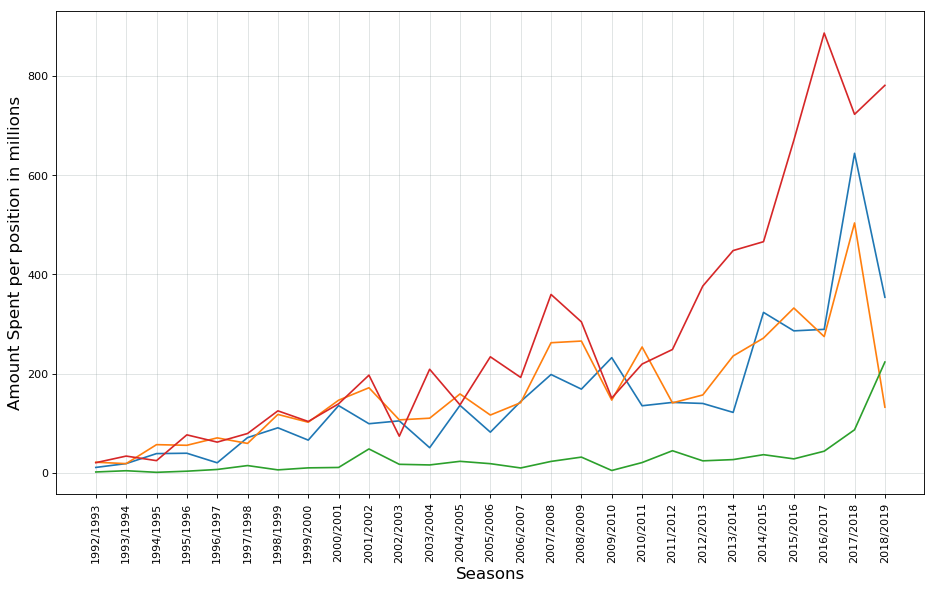

In [19]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(df_grouped)
plt.grid(True, color="#93a1a1", alpha=0.3)
plt.xlabel('Seasons', fontsize=15)
plt.ylabel('Amount Spent per position in millions', fontsize=15)
plt.xticks(rotation=90)
plt.show()